# 연구과제2. 식용 버섯 분류 모델 만들기

## #1. 패키지 참조

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

# Intel SKlearn 하드웨어 가속 패치 설정
import sys
if sys.platform == 'win32':
    from sklearnex import patch_sklearn
    patch_sklearn()

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

import re

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## #2. 데이터 불러오기

In [4]:
categories = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
origin = my_read_excel('C:/Users/Jihwan/Desktop/01Class/E.추론통계/E.InferentialStatistics/수업자료/mushrooms.xlsx',categories=categories)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [3]:
origin.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

> - 분석목적: 버섯의 특성에 관한 데이터로 독버섯과 식용버섯을 구분하는 모델 만들기
> --------
> - 총 8,124행 23열
> - 종속변수: class(p-독성,e-식용), 나머지 독립변수
> - 데이터 타입은 전부 문자형이라서 카테고리 타입으로 변환해줌
> - null값은 없음
> - 전처리 방향: 종속변수 라벨링 후 숫자형 변환, 나머지 변수는 더미변수화

## #3. 전처리

In [5]:
# 종속변수 라벨링
df = origin.copy()
df['class'] = df['class'].map({'p':0, 'e':1})    # 0: 독성  , 1: 식용
df['class']

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: category
Categories (2, int64): [1, 0]

In [6]:
# 종속변수 형변환
df['class'] = df['class'].astype('int')
df.dtypes

class                          int32
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

## #3. EDA

In [14]:
xname=df.drop('class',axis=1).columns

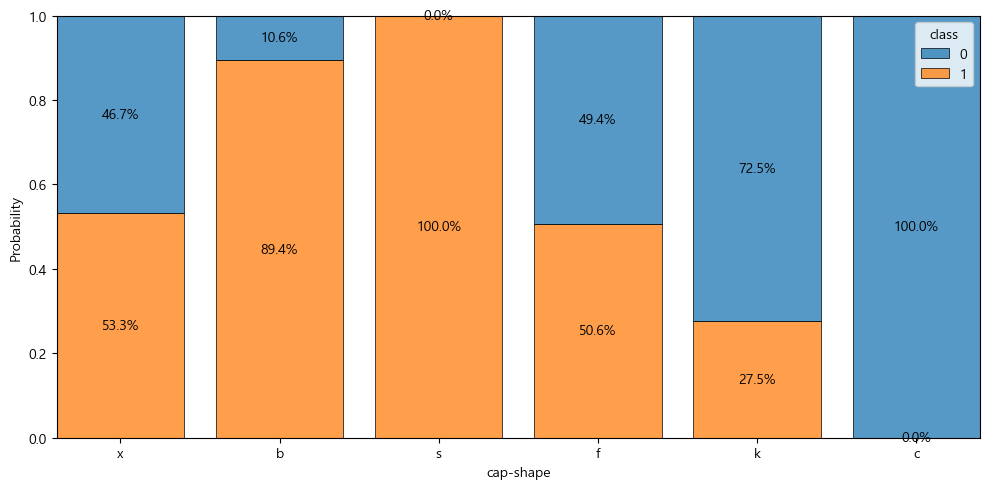

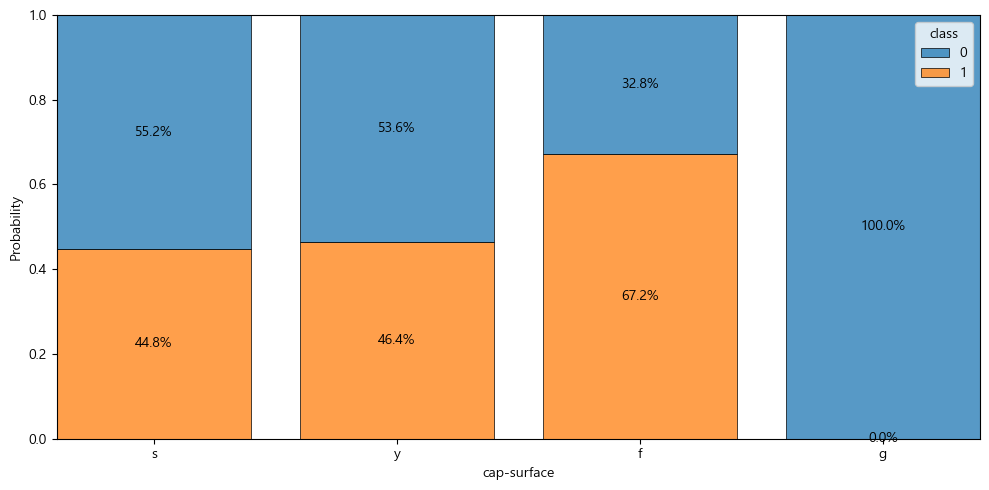

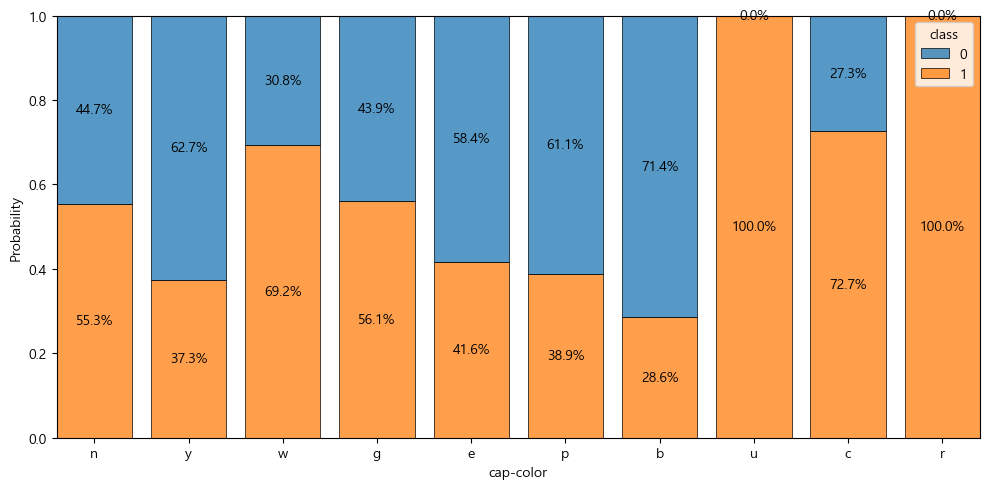

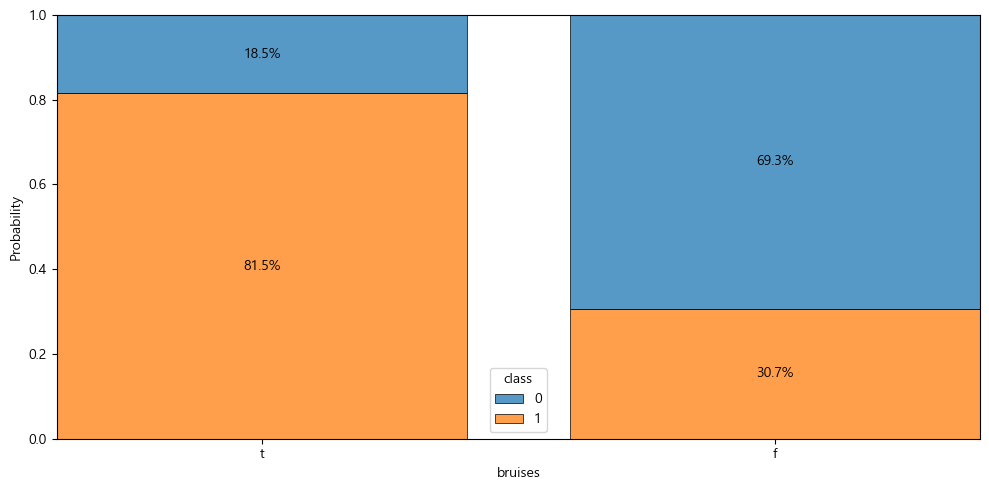

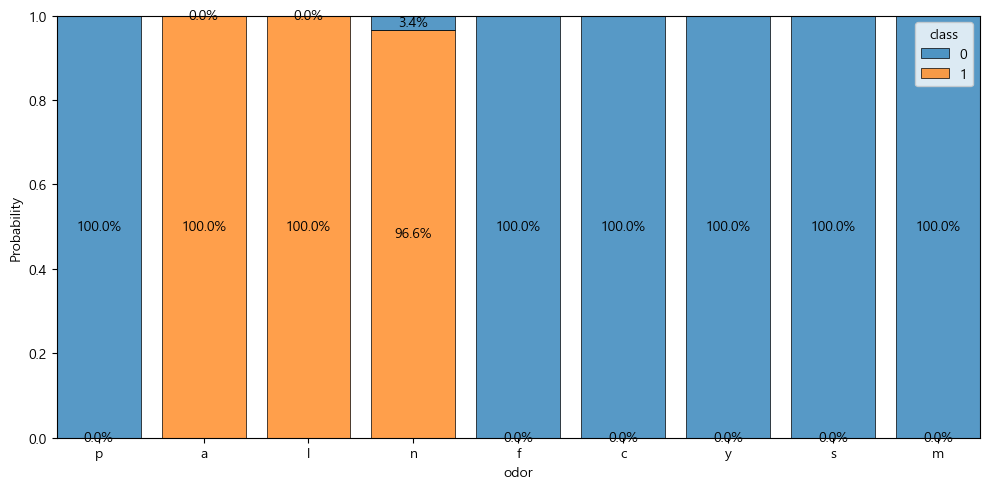

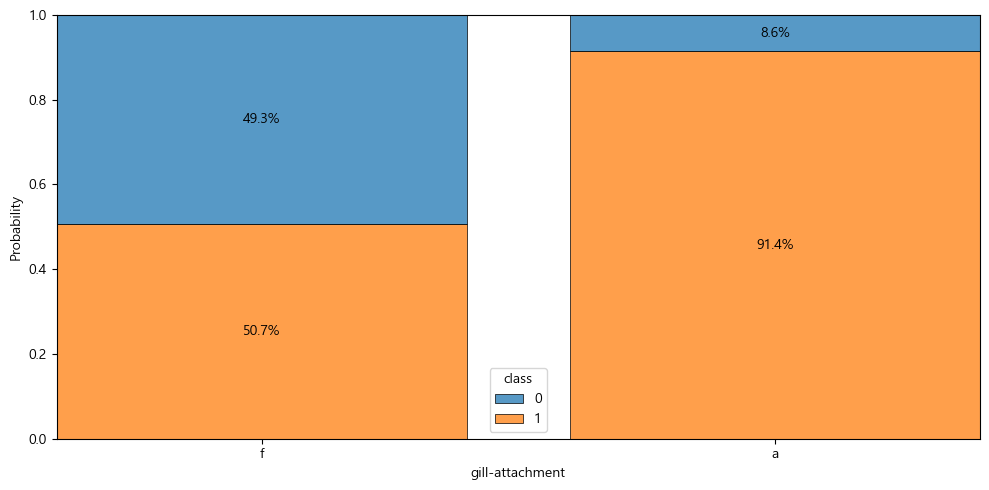

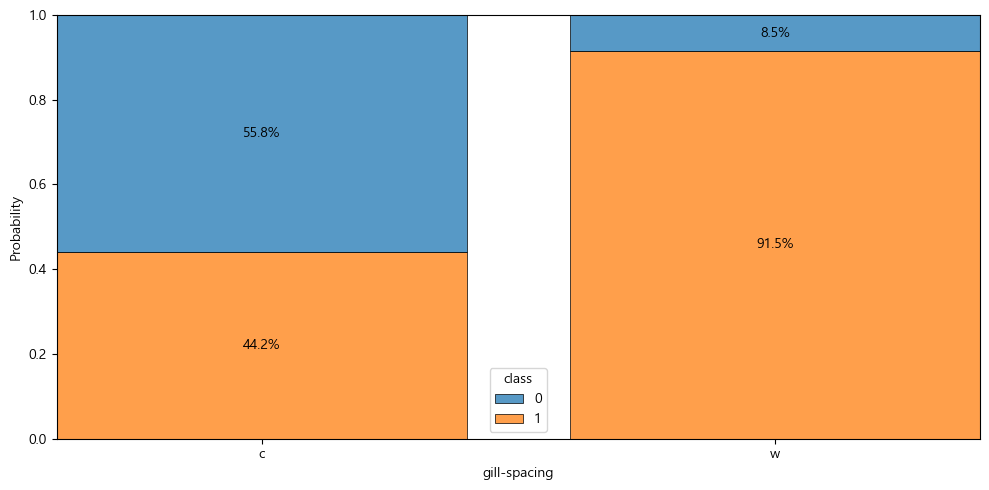

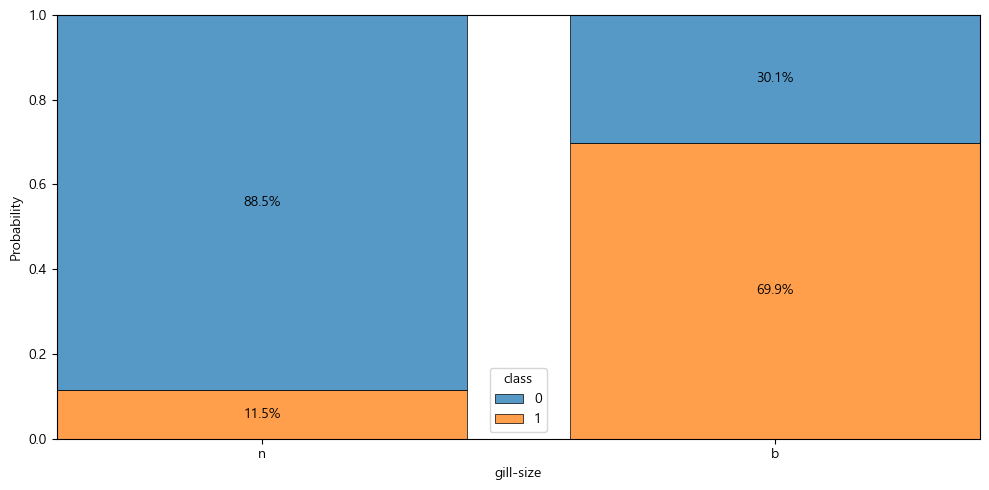

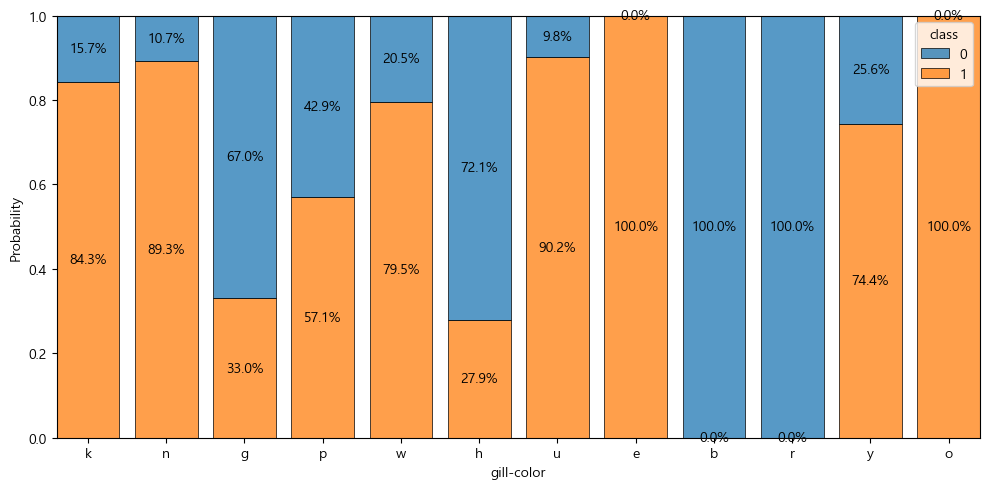

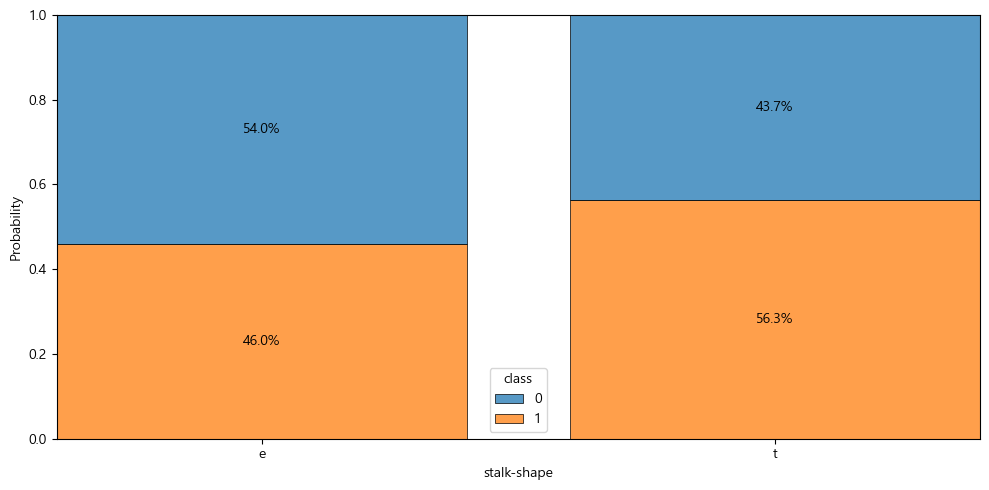

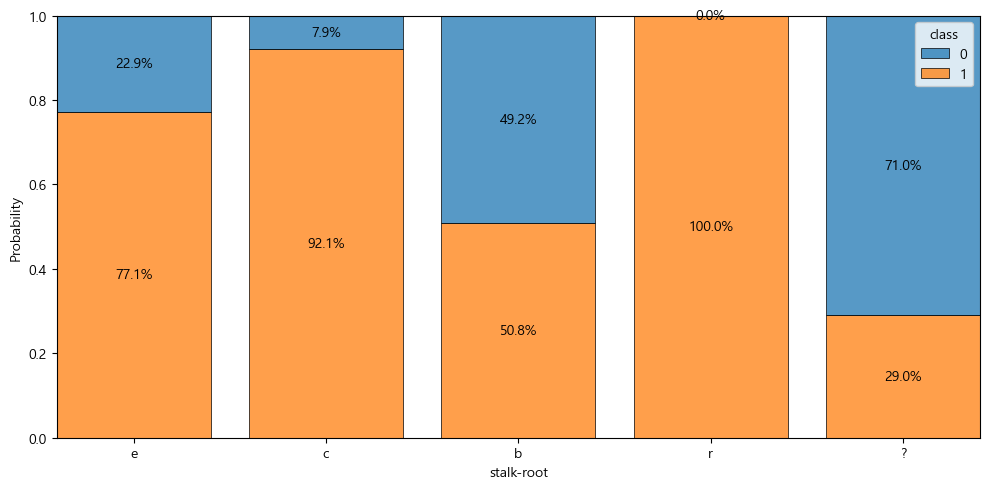

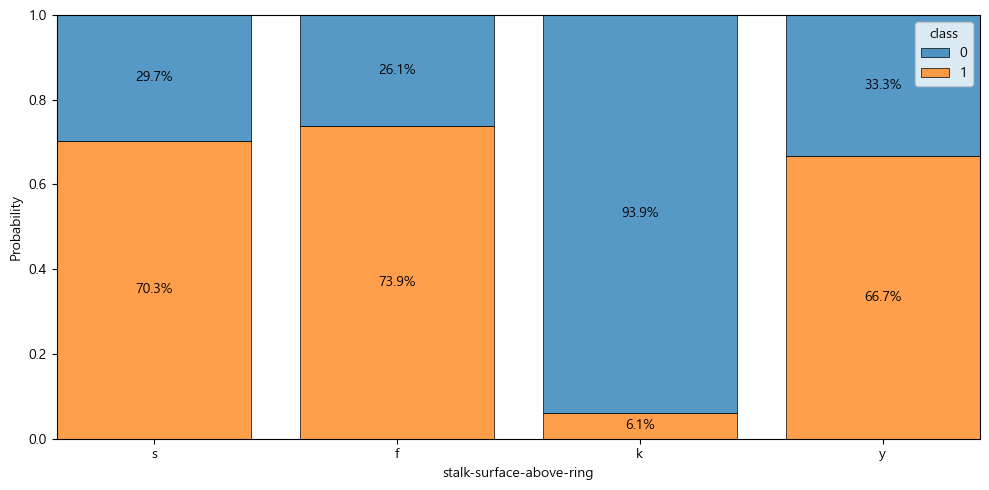

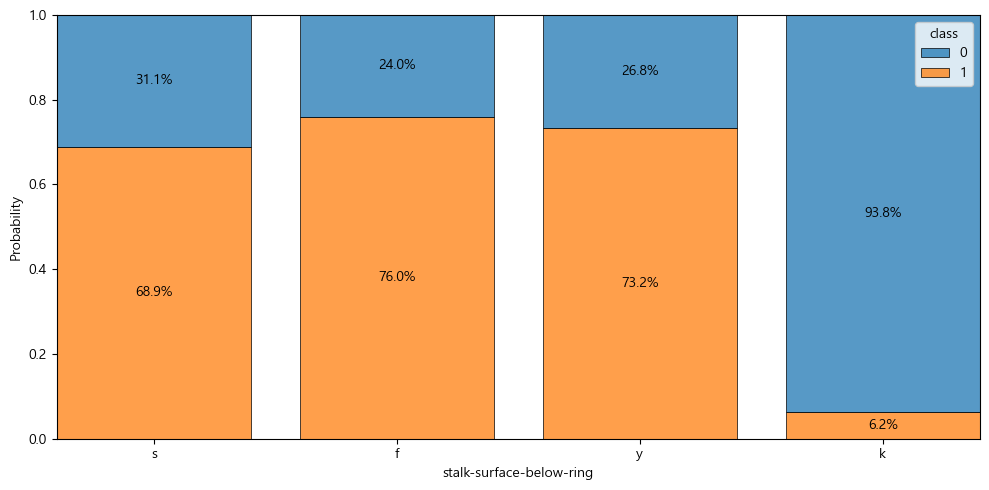

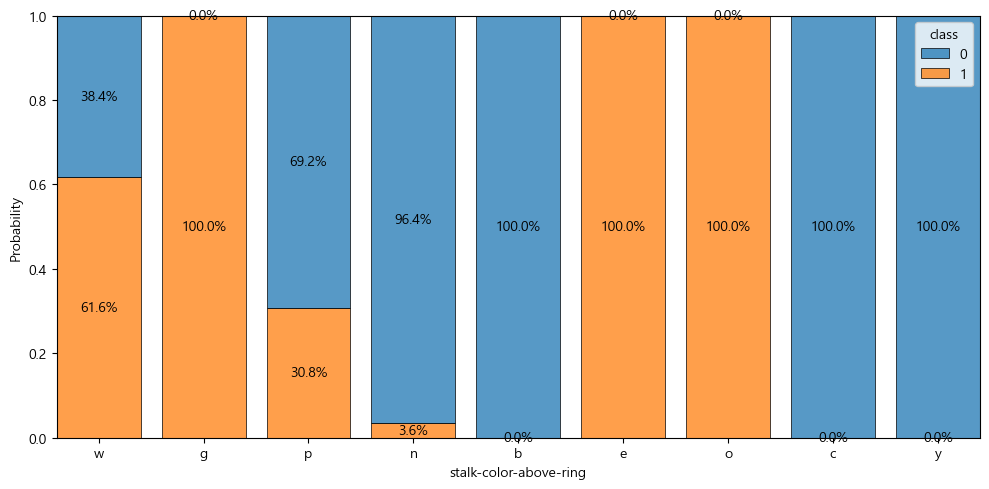

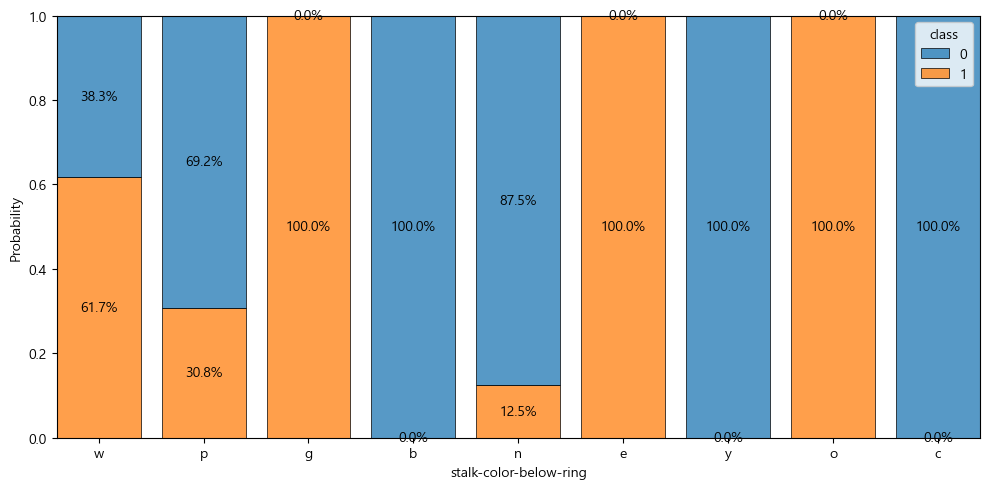

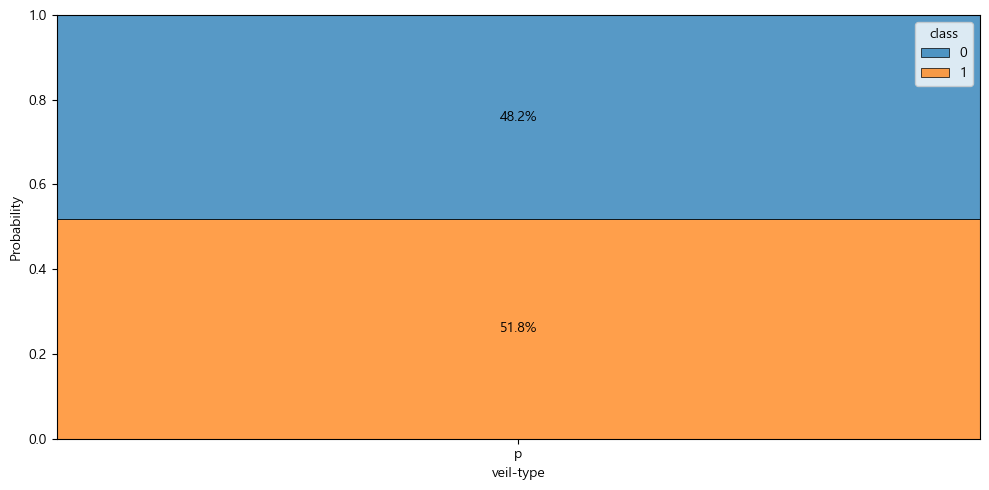

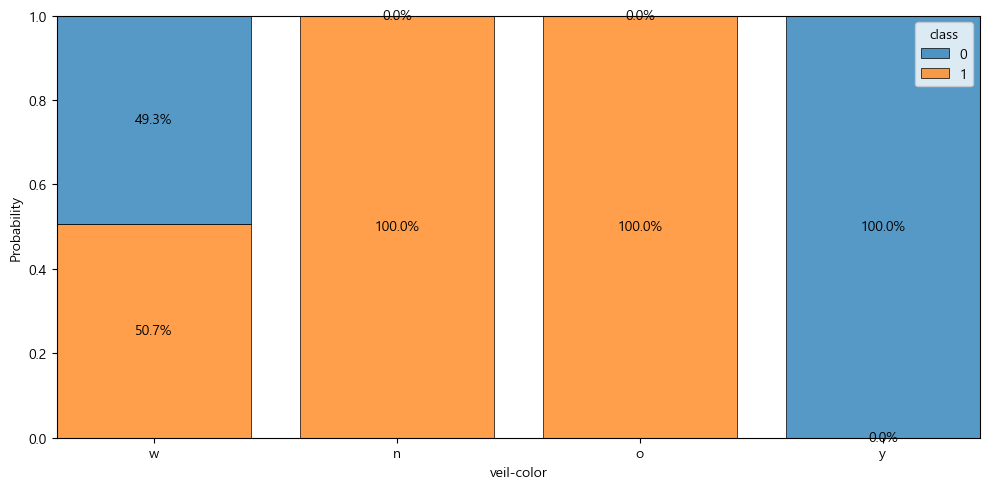

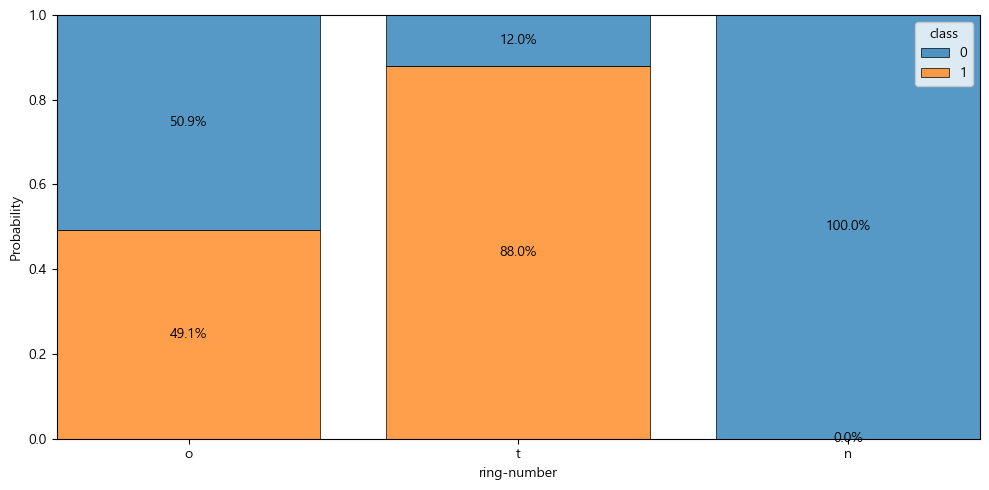

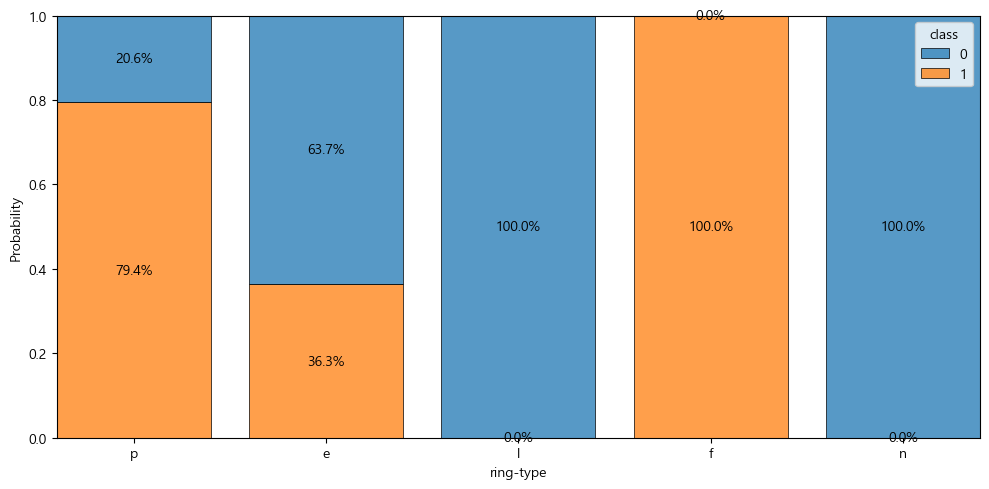

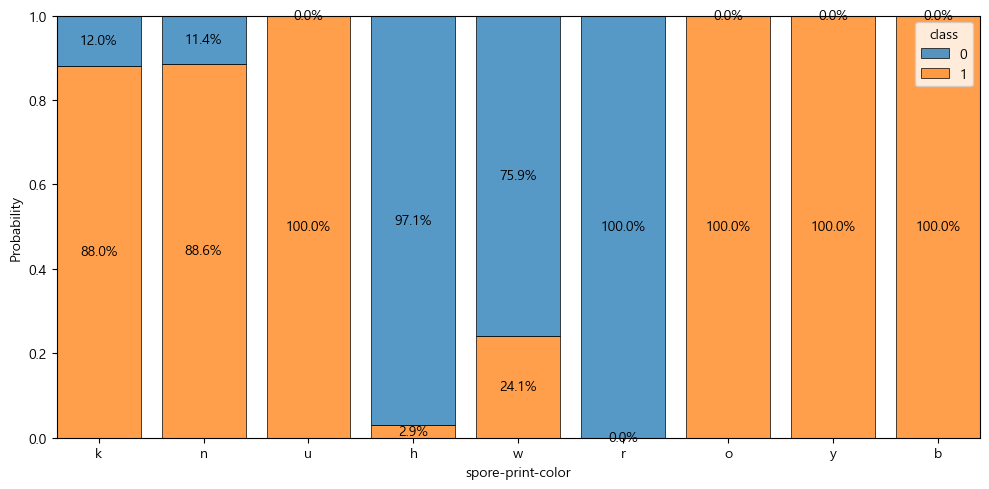

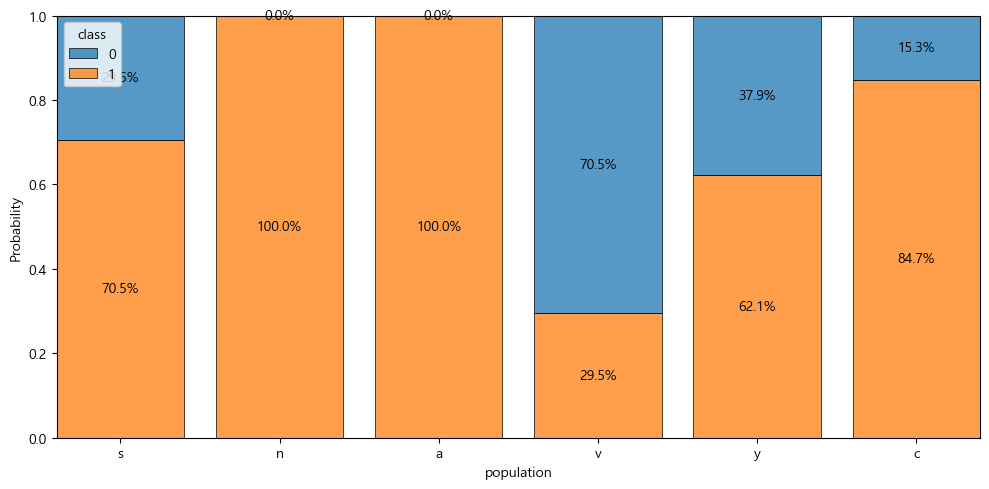

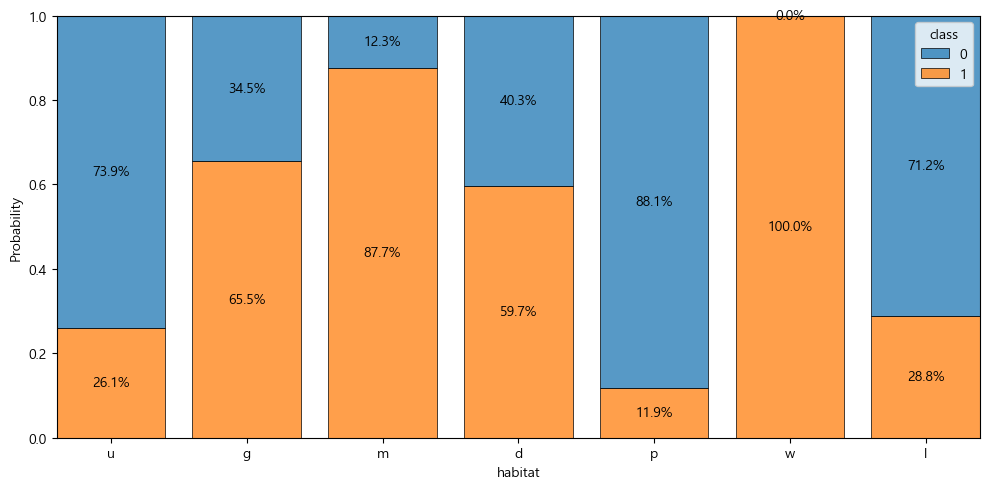

In [15]:
# 종속변수에 따른 데이터 분포 확인
for x in xname:
    my_stackplot(df, xname=x, hue='class')

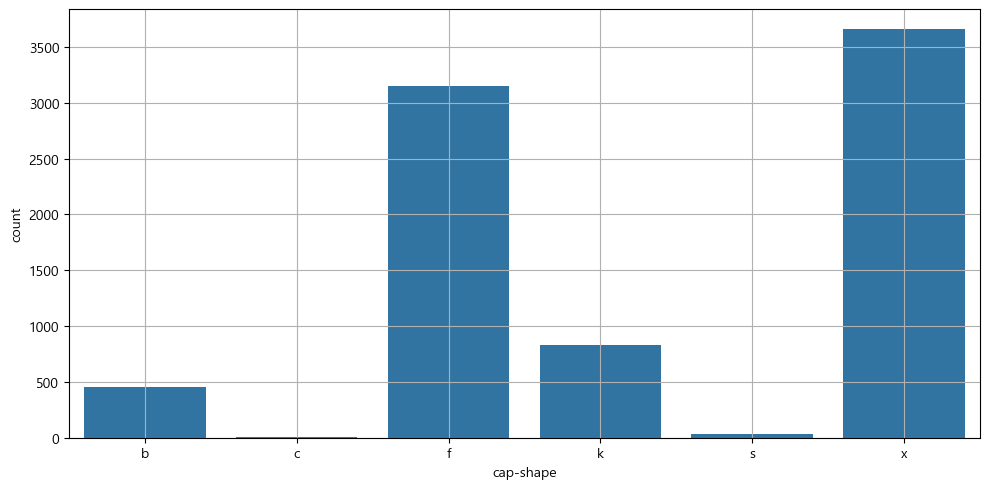

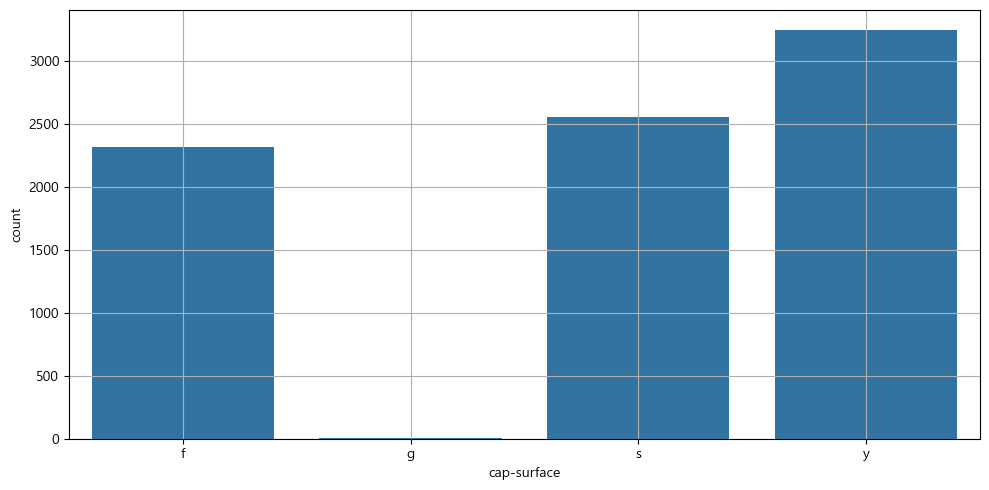

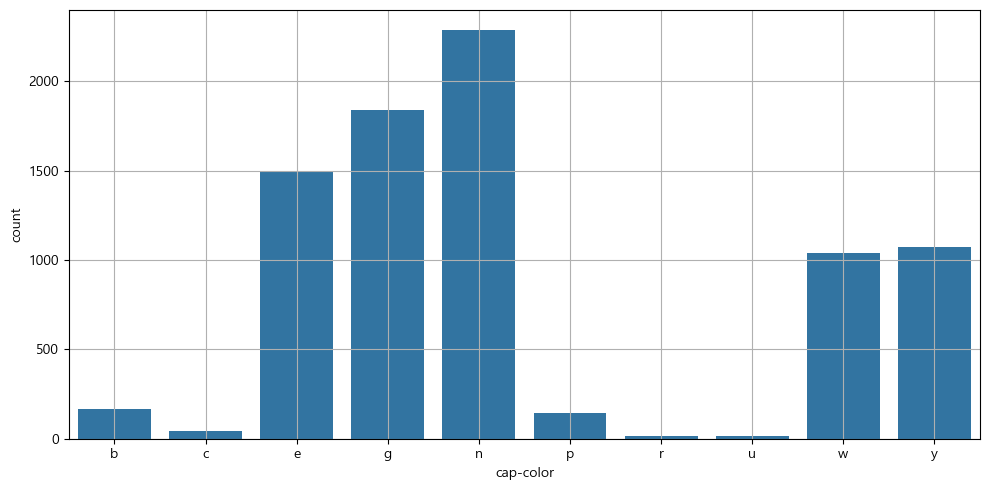

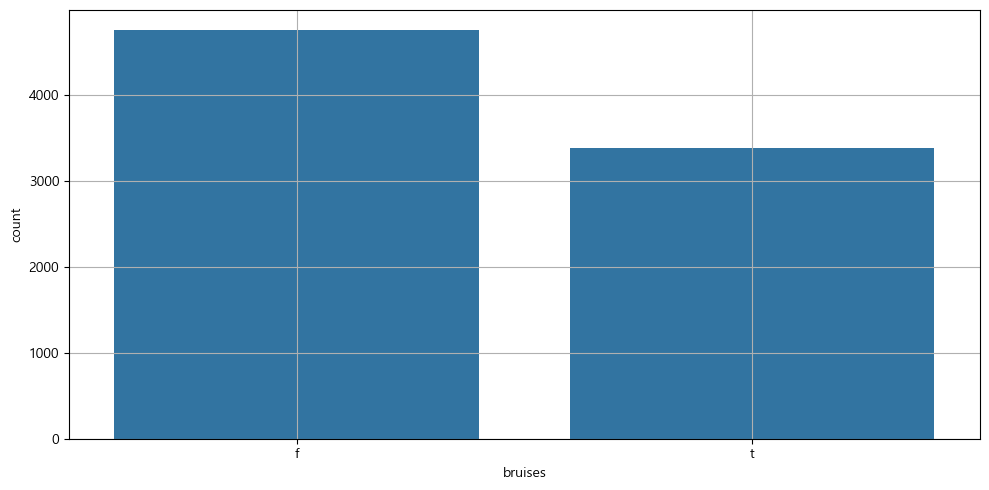

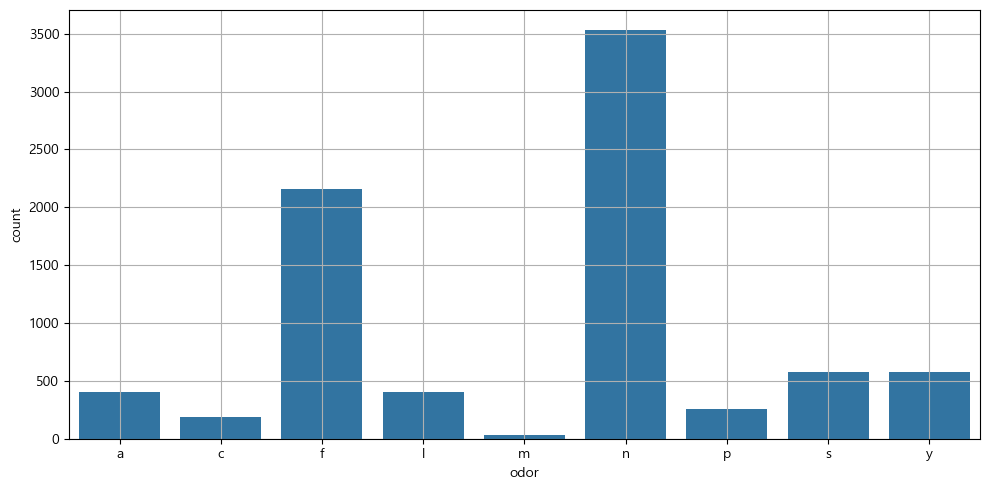

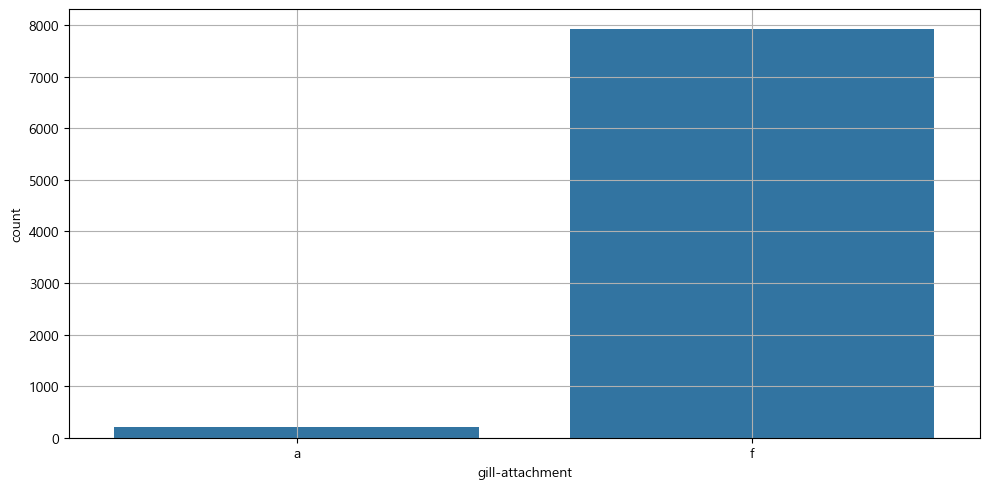

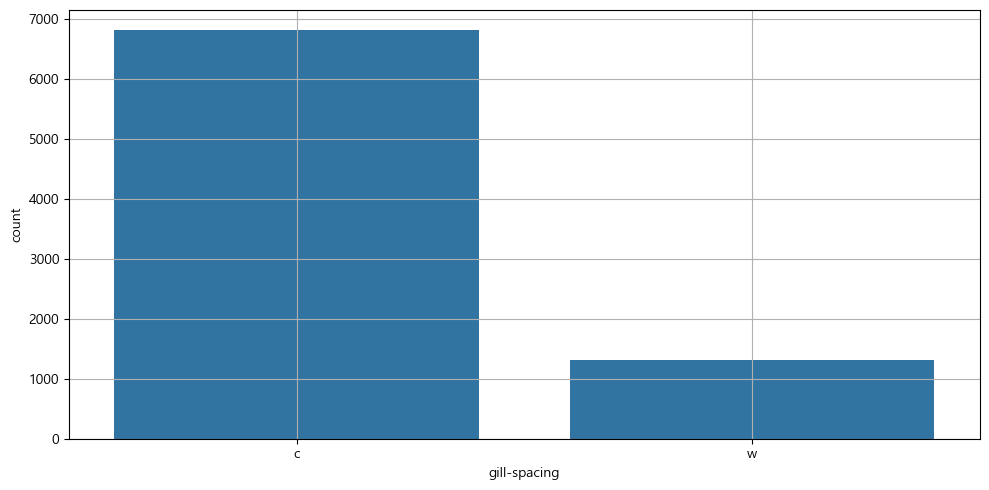

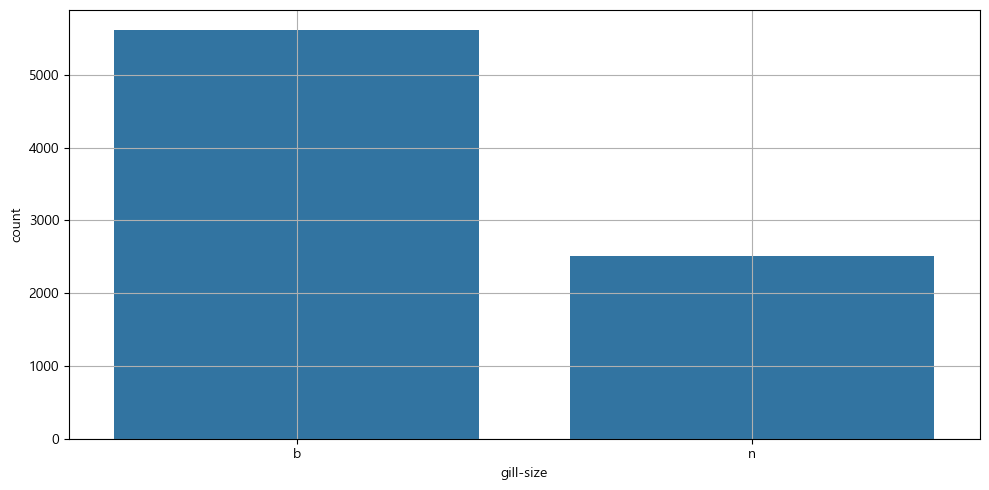

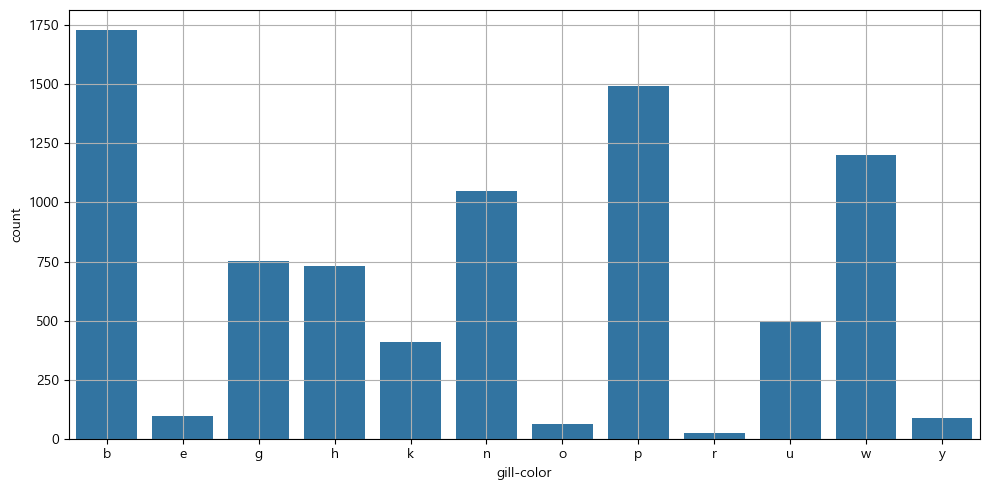

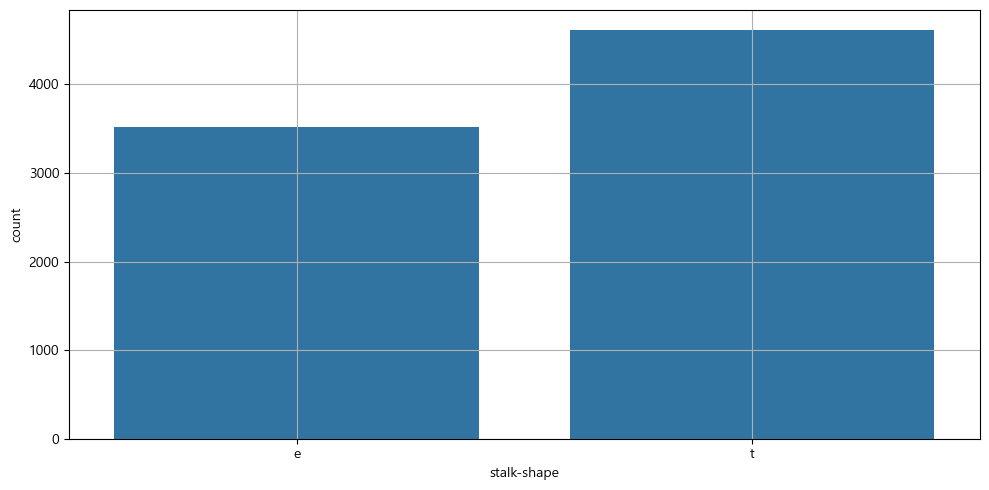

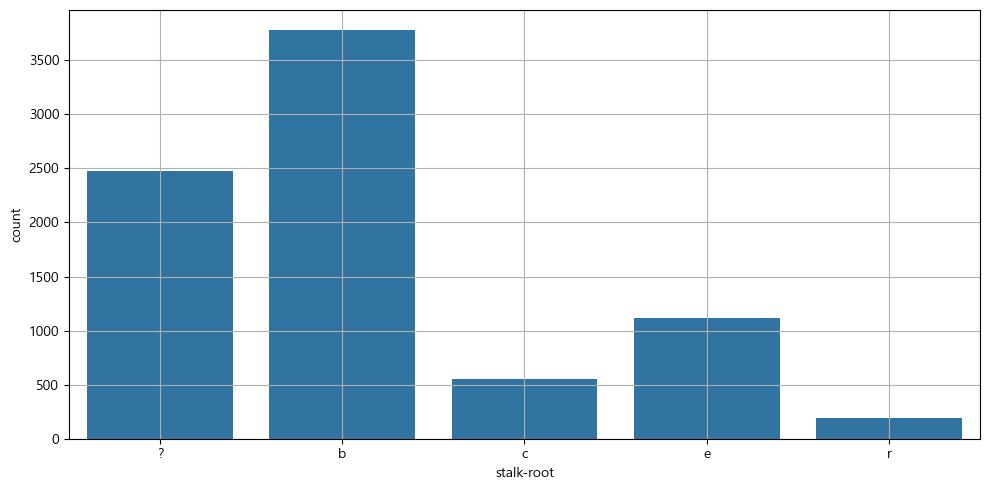

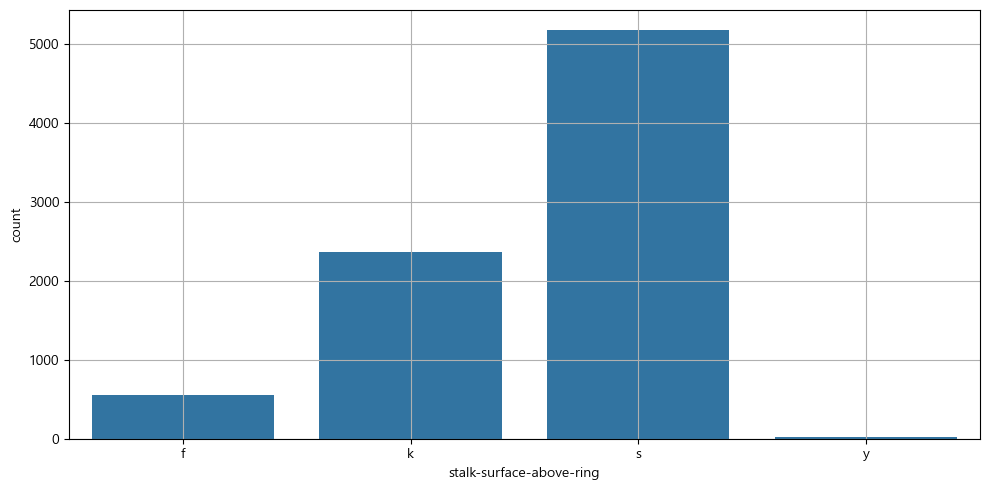

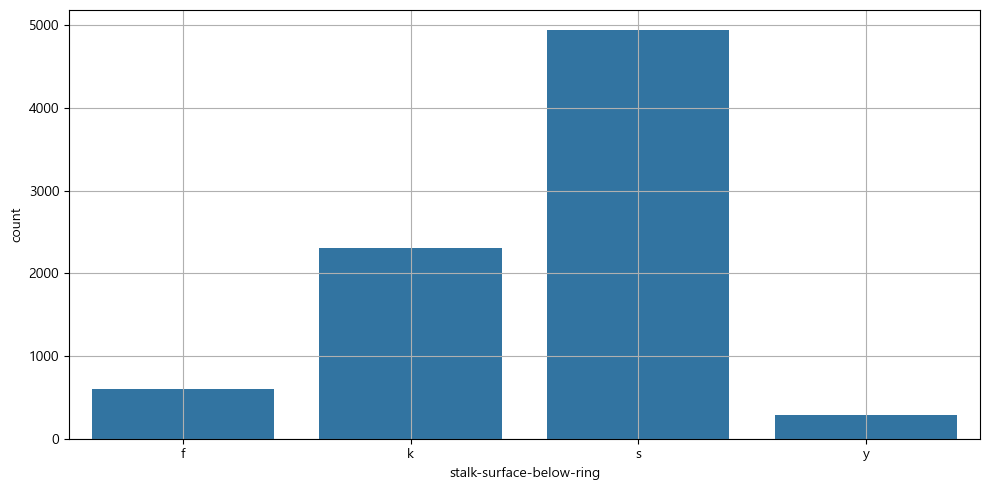

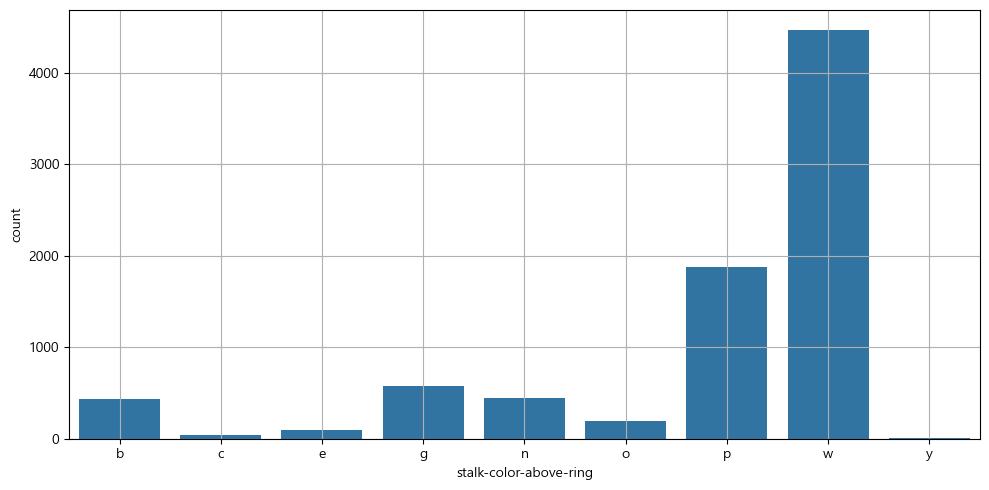

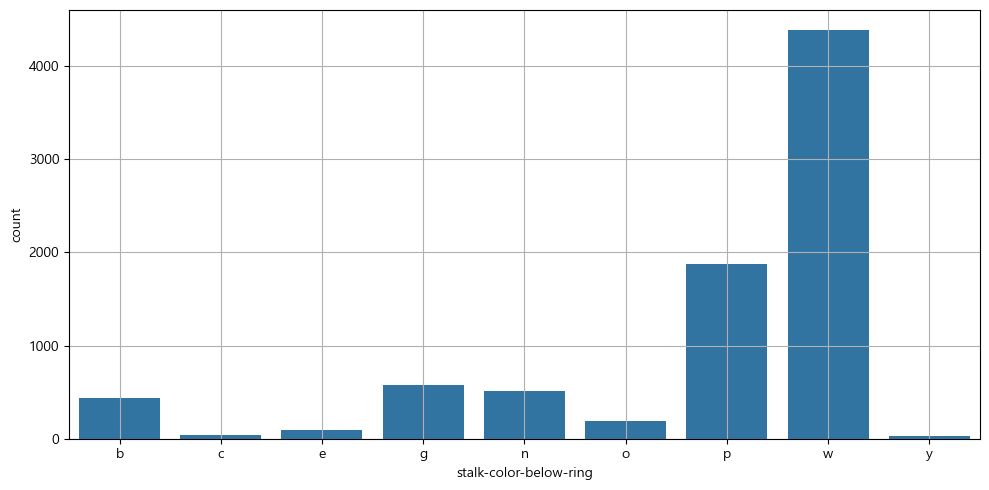

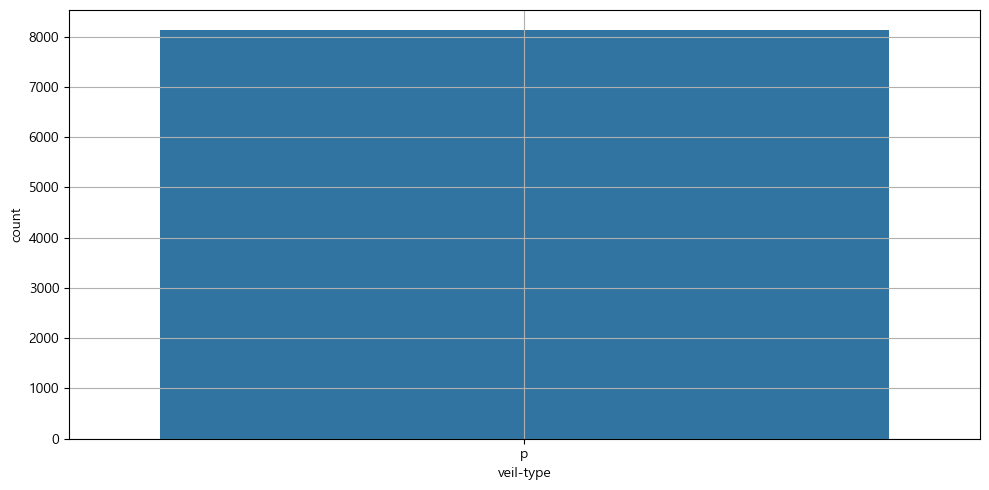

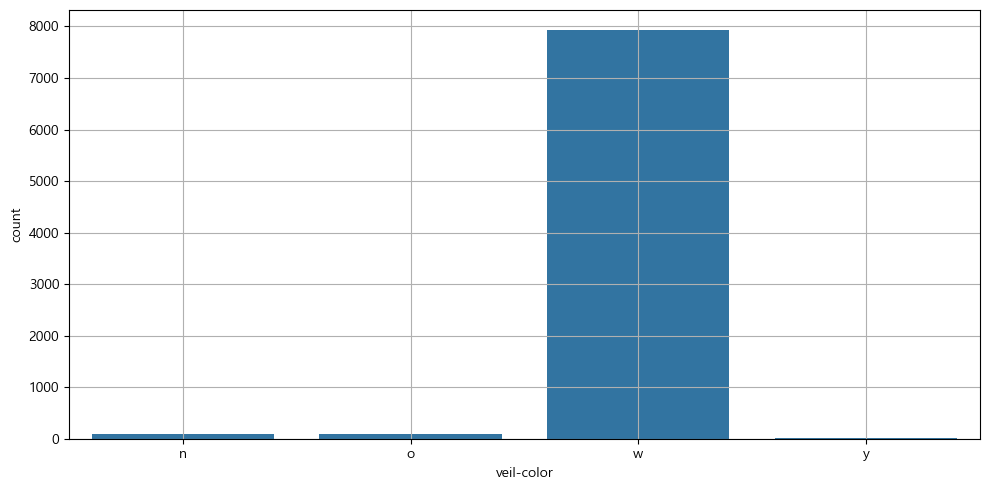

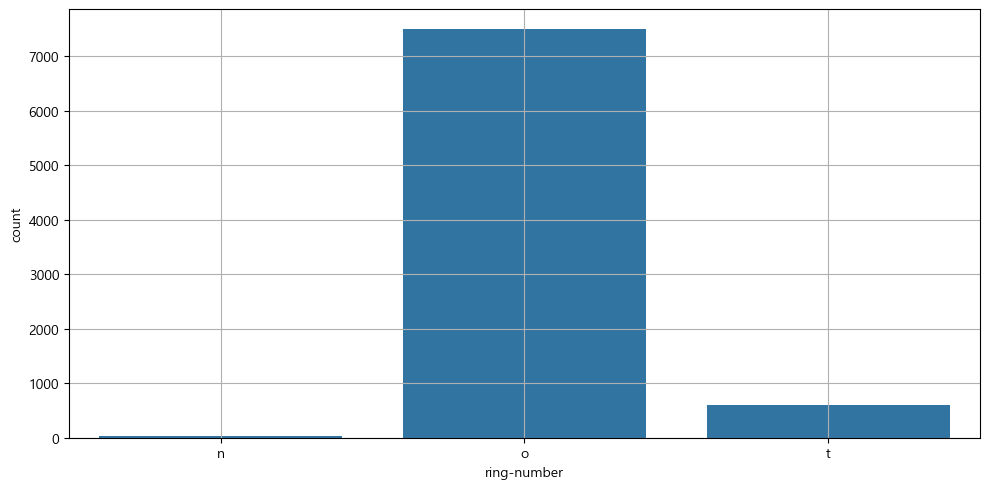

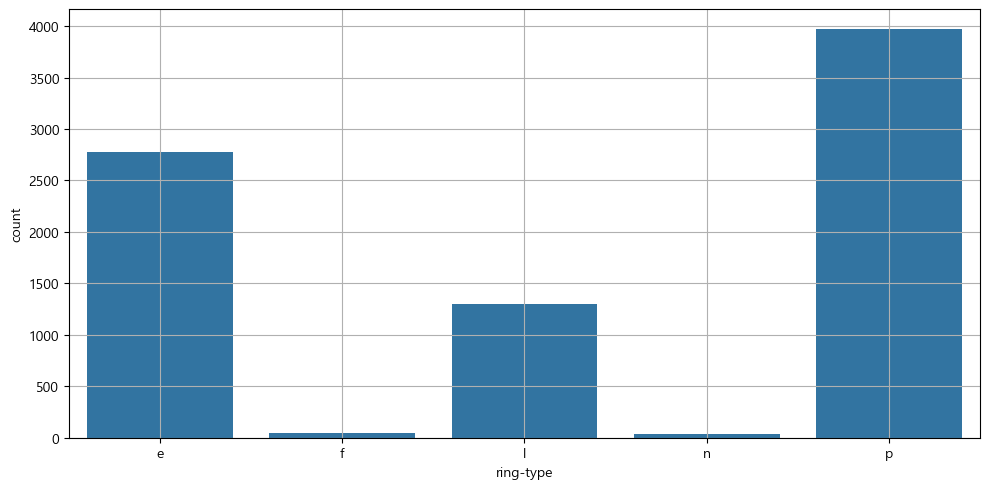

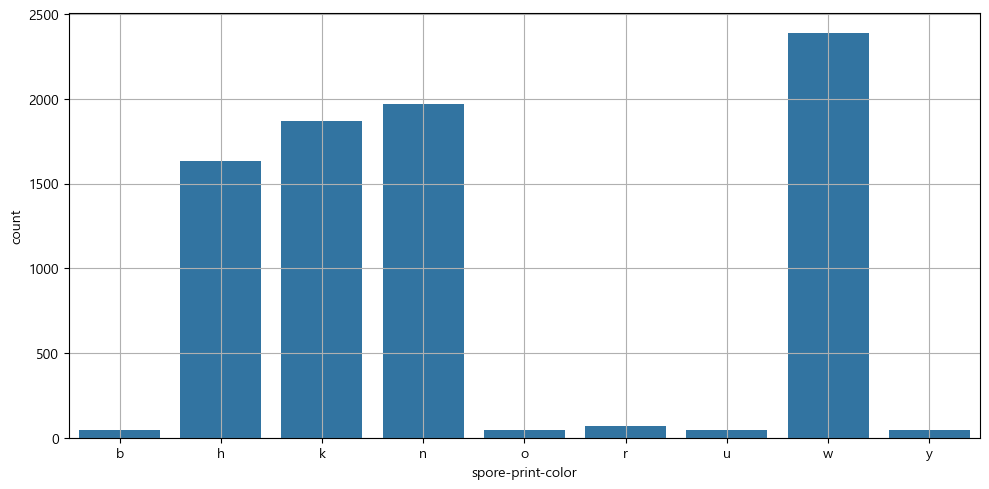

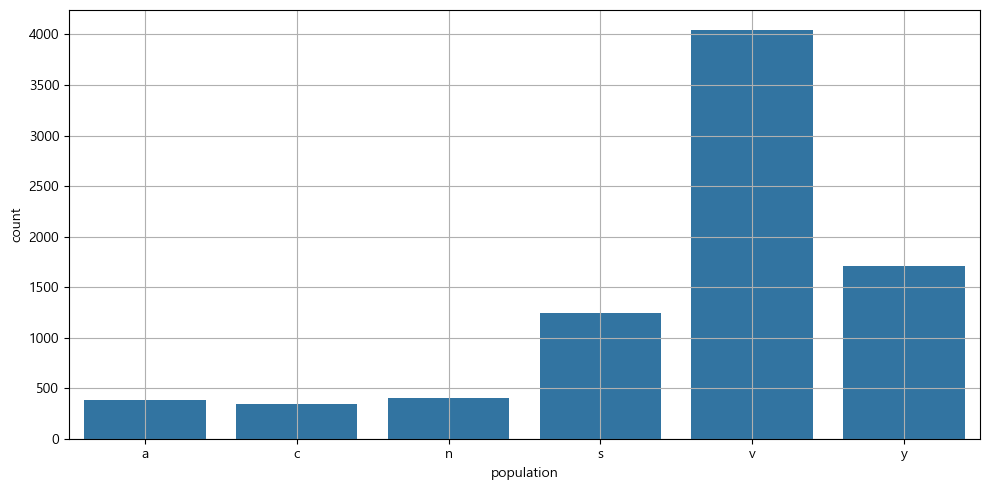

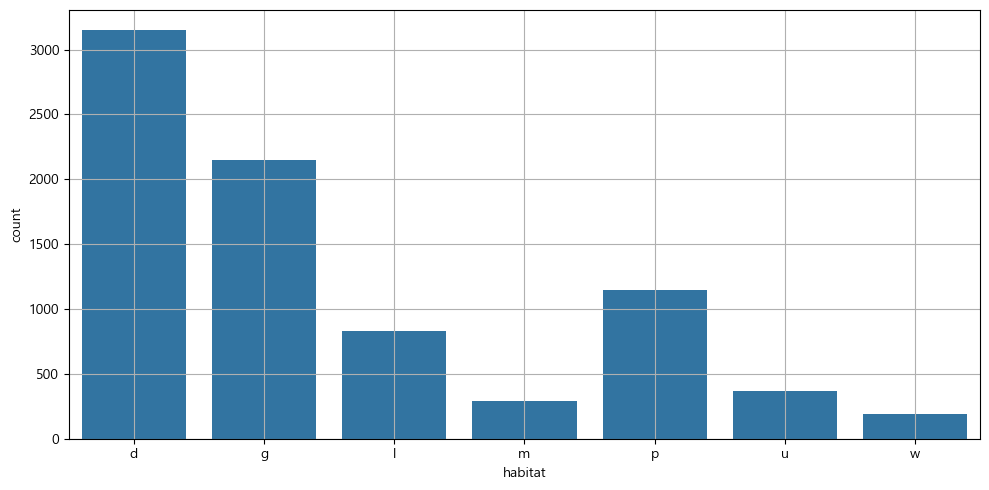

In [17]:
for x in xname:
    my_countplot(df, xname=x)

## #4. 명목형 변수 더미화 및 데이터 분할

In [21]:
# 더미화
df_dummy = my_dummies(df)
df_dummy.head()

,class,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
# 종속변수 데이터 타입 확인
df_dummy.dtypes

class          int32
cap-shape_c    int32
cap-shape_f    int32
cap-shape_k    int32
cap-shape_s    int32
               ...  
habitat_l      int32
habitat_m      int32
habitat_p      int32
habitat_u      int32
habitat_w      int32
Length: 96, dtype: object

In [23]:
# 데이터 분할
x_train, x_test, y_train, y_test = my_train_test_split(df_dummy, yname='class')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6499, 95), (1625, 95), (6499,), (1625,))

## #5. 분석모델 적용

<class 'sklearn.naive_bayes.GaussianNB'>는 n_jobs를 허용하지 않음
[교차검증 TOP5]
+----+-----------------+-------------------+
|    |   var_smoothing |   mean_test_score |
|----+-----------------+-------------------|
|  4 |           1e-05 |          0.991537 |
|  3 |           1e-06 |          0.988306 |
|  2 |           1e-07 |          0.979382 |
|  1 |           1e-08 |          0.965533 |
|  0 |           1e-09 |          0.950454 |
+----+-----------------+-------------------+

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.990922 |     0.987692 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.999392 |     0.998817 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재

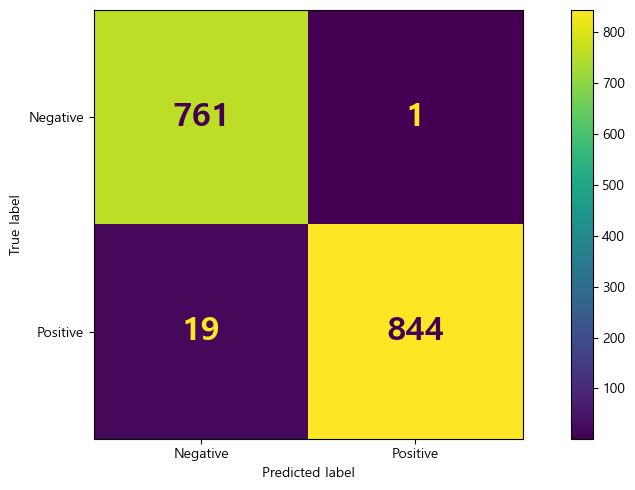

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


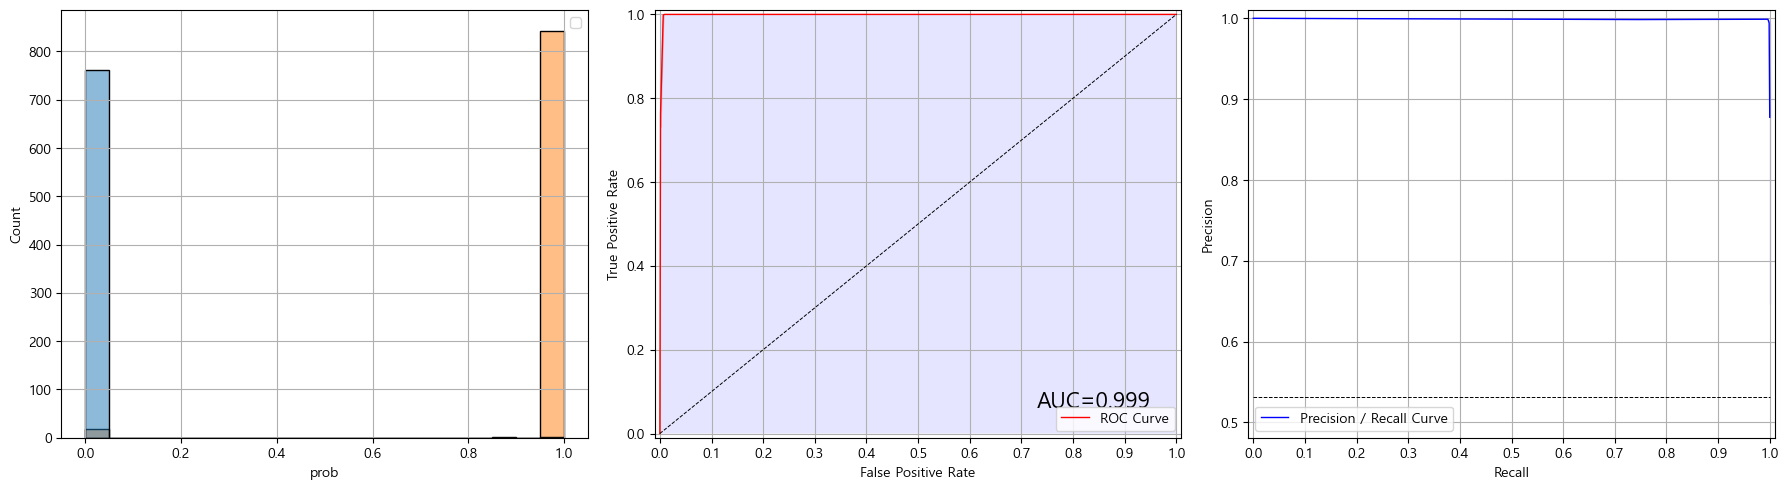


[학습곡선]


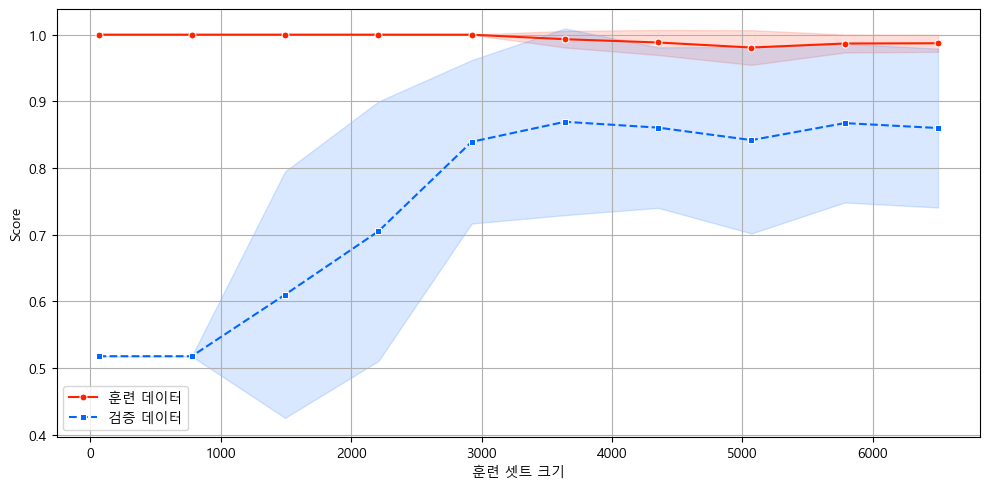

GaussianNB(var_smoothing=1e-05)

In [24]:
my_nb_classification(x_train,y_train,x_test,y_test)

In [25]:
my_classification(x_train, y_train, x_test, y_test)

<class 'sklearn.naive_bayes.GaussianNB'>는 n_jobs를 허용하지 않음
+----------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------+
|                      |   의사결정계수(Pseudo R2) |   정확도(Accuracy) |   정밀도(Precision) |   재현율(Recall) |   위양성율(Fallout) |   특이성(TNR) |   F1 Score |      AUC |
|----------------------+---------------------------+--------------------+---------------------+------------------+---------------------+---------------+------------+----------|
| GaussianNB           |                         0 |           0.945231 |            0.998711 |          0.89803 |          0.00131234 |      0.998688 |   0.945699 | 0.999097 |
| KNeighborsClassifier |                         0 |                  1 |                   1 |                1 |                   0 |             1 |          1 |        1 |
| LogisticRegression   |                   0.99791 |                  1 |      

In [26]:
df_columns = list(origin.columns)
df_columns


['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [27]:
df = my_labelling(origin, *df_columns)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
